In [1]:
%pylab inline

import os.path as op
import sys
import matplotlib.pyplot as plt
import glob

import io3d
import sed3

# sys.path.append(op.expanduser("~/projects/bodynavigation"))
# pt = op.expanduser("~/projects/imtools")
# sys.path.insert(0, pt)

import bodynavigation
import imtools
# reload(imtools)
# reload(bodynavigation)

import imtools.trainer3d
import imtools.datasets

Populating the interactive namespace from numpy and matplotlib


In [2]:
sliver_reference_dir = op.expanduser("~/data/medical/orig/sliver07/training/")

# Other example with chest information

## Training

Prepare function to calculate feature vector from 3D to [1D x number_of_features]

In [3]:
def localization_fv2(data3d, voxelsize_mm):        # scale
        fv = []
        # f0 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=3).reshape(-1, 1)
        #f1 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=1).reshape(-1, 1) - f0
        #f2 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=5).reshape(-1, 1) - f0
        #f3 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=10).reshape(-1, 1) - f0
        #f4 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=20).reshape(-1, 1) - f0
        # position asdfas
        import bodynavigation as bn
        ss = bn.BodyNavigation(data3d, voxelsize_mm)
        fd1 = ss.dist_to_lungs().reshape(-1, 1)
        fd2 = ss.dist_to_spine().reshape(-1, 1)
        fd3 = ss.dist_sagittal().reshape(-1, 1)
        fd4 = ss.dist_coronal().reshape(-1, 1)
        fd5 = ss.dist_axial().reshape(-1, 1)
        fd6 = ss.dist_to_surface().reshape(-1, 1)
        fd7 = ss.dist_diaphragm().reshape(-1, 1)
        fd8 = ss.dist_to_chest().reshape(-1, 1)

        # f6 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=[20, 1, 1]).reshape(-1, 1) - f0
        # f7 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=[1, 20, 1]).reshape(-1, 1) - f0
        # f8 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=[1, 1, 20]).reshape(-1, 1) - f0

        # print "fv shapes ", f0.shape, fd2.shape, fd3.shape
        fv = np.concatenate([
                # f0,
#                 f1, f2, f3, f4,
                fd1, fd2, fd3, fd4, fd5, fd6, fd7,
                #f6, f7, f8
            ], 1)


        return fv

In [4]:
import imtools.trainer3d
import imtools.datasets
ol = imtools.trainer3d.Trainer3D()
ol.feature_function = localization_fv2

for one in imtools.datasets.sliver_reader(
    "*[0-2].mhd", read_seg=True,
    sliver_reference_dir=sliver_reference_dir):
    
    numeric_label, vs_mm, oname, orig_data, rname, ref_data = one
    ol.add_train_data(orig_data, ref_data, voxelsize_mm=vs_mm)
    
ol.fit()

/Users/mjirik/miniconda/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/mjirik/miniconda/lib/python2.7/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "
/Users/mjirik/miniconda/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


## Testing

In [8]:
one = list(imtools.datasets.sliver_reader("*019.mhd", read_seg=True))[0]
numeric_label, vs_mm, oname, orig_data, rname, ref_data = one
fit = ol.predict(orig_data, voxelsize_mm=vs_mm)

(156, 209, 209)
(6814236,)


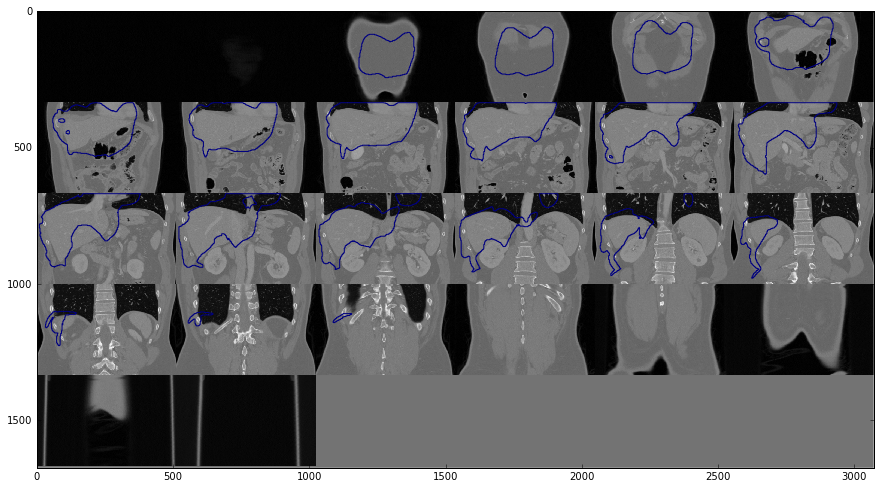

In [9]:
plt.figure(figsize=(15,10))
sed3.show_slices(orig_data, fit, slice_step=20, axis=1, flipV=True)

In [10]:
import lisa.volumetry_evaluation
lisa.volumetry_evaluation.compare_volumes_sliver(ref_data, fit, vs_mm)

{'avgd': 17.114922361307876,
 'err1_mm3': 184280.43956671853,
 'err1_percent': 7.7120205701469562,
 'err2_mm3': 1873933.5394341913,
 'err2_percent': 78.422940802528913,
 'maxd': 84.40796016702707,
 'rmsd': 510.79682112819017,
 'sliver_avgd_pts': 0,
 'sliver_maxd_pts': 0,
 'sliver_overall_pts': 0.0,
 'sliver_rmsd_pts': 0,
 'sliver_vd_pts': 0,
 'sliver_voe_pts': 0,
 'vd': 109.38421150413717,
 'voe': 43.067480686337937,
 'volume1_mm3': 1544695.5978684055,
 'volume2_mm3': 3234348.6977358782}